In [1]:
from covid19.tools import get_day_avg_shortest_path, get_df_first, get_muni_cases, get_lockdown_dates, get_cases_per_tests, get_perc
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import os
import datetime
%matplotlib inline

In [2]:
if os.path.exists('../data/results/first.npy'):
    days, dist = np.load('../data/results/first.npy')
    days = pd.to_datetime(days)
    dist = np.array(list(map(float, dist)))
else:
    df = get_df_first('telco_directed.json')
    days, dist = get_day_avg_shortest_path(df)

In [3]:
doi = get_lockdown_dates()

In [4]:
mun = get_muni_cases('../data/Municipality_cases_time_series.csv')

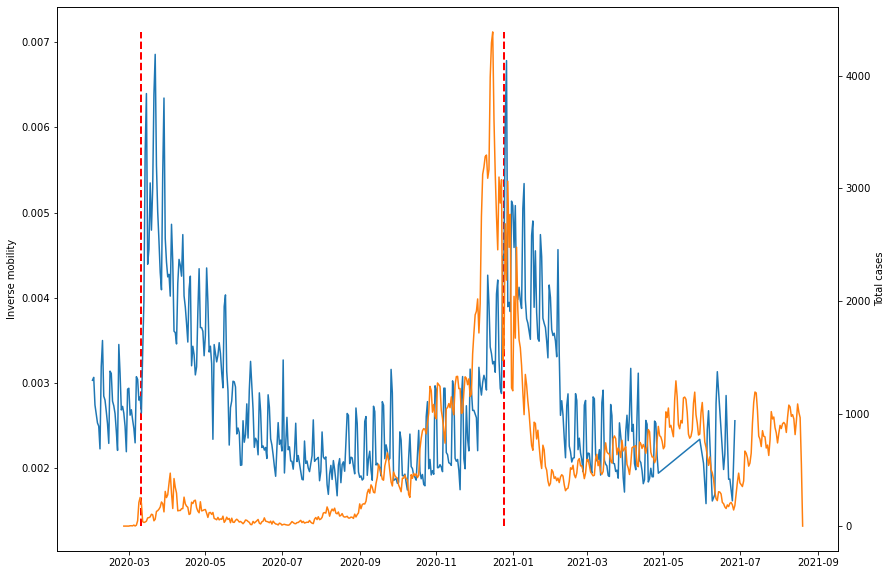

In [5]:
fig, ax1 = plt.subplots(figsize=(14, 10))
ax1.plot(days, dist)
ax1.set_ylabel('Inverse mobility')
ax1.vlines(doi, *ax1.get_ylim(), color='r', linewidth=2, linestyle='--')
ax2 = ax1.twinx()
ax2.plot(pd.to_datetime(mun.index), mun.total, c='C1')
ax2.set_ylabel('Total cases')
plt.savefig('../presentation/figures/case_mobility.png')

In [6]:
cpt = get_cases_per_tests('../data/Municipality_cases_time_series.csv', '../data/Municipality_tested_persons_time_series.csv')
smoothed_c_per_t = cpt.cases_per_tests.rolling(window=7).mean()

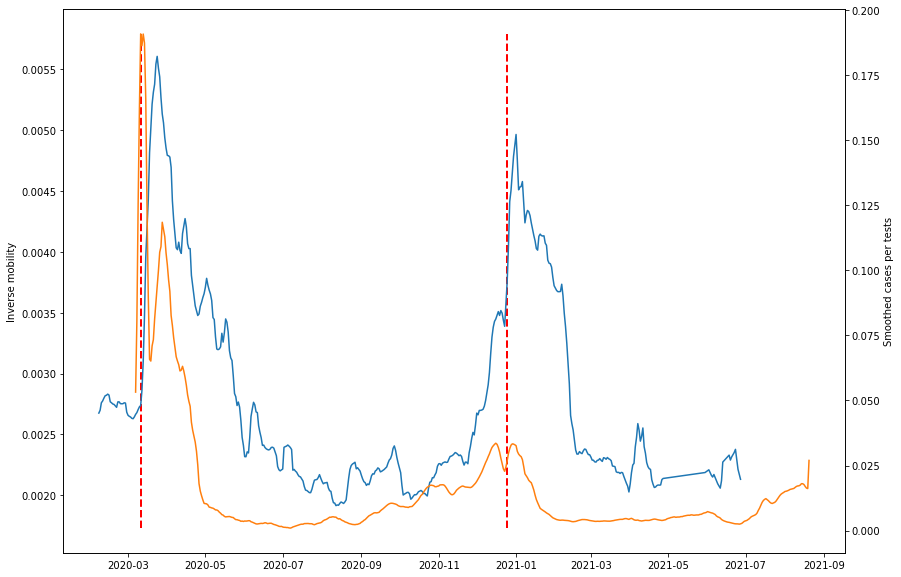

In [7]:
fig, ax1 = plt.subplots(figsize=(14, 10))
ax1.plot(days, pd.Series(dist).rolling(window=7).mean())
ax1.set_ylabel('Inverse mobility')
ylims = ax1.get_ylim()
ax1.vlines(doi, *ylims, color='r', linewidth=2, linestyle='--')
#plt.vlines(doi[0] + datetime.timedelta(days=7), *ylims, color='y');
#plt.vlines(doi[0] + datetime.timedelta(days=14), *ylims, color='g');
#plt.vlines(doi[1] + datetime.timedelta(days=7), *ylims, color='y');
#plt.vlines(doi[1] + datetime.timedelta(days=14), *ylims, color='g');
ax2 = ax1.twinx()
ax2.plot(pd.to_datetime(cpt.index), smoothed_c_per_t, c='C1')
ax2.set_ylabel('Smoothed cases per tests')
plt.savefig('../presentation/figures/cpt_mobility.png')

In [8]:
print('Smoothed case/tests(1):', get_perc(cpt.index, smoothed_c_per_t, (7, 14), doi[0]), '%')
print('Avg_short_path(1):', get_perc(days, dist, (-7, 7), doi[0]), '%')
print('Smoothed vvg_short_path(1):', get_perc(days, pd.Series(dist).rolling(window=7).mean(), (-7, 7), doi[0]), '%')

print()
print('Smoothed case/tests(2):', get_perc(cpt.index, smoothed_c_per_t, (7, 14), doi[1]), '%')
print('Avg_short_path(2):', get_perc(days, dist, (-7, 7), doi[1]), '%')
print('Smoothed avg_short_path(2):', get_perc(days, pd.Series(dist).rolling(window=7).mean(), (-7, 7), doi[1]), '%')

Smoothed case/tests(1): -21.2 %
Avg_short_path(1): 67.3 %
Smoothed vvg_short_path(1): 38.0 %

Smoothed case/tests(2): -6.4 %
Avg_short_path(2): 33.3 %
Smoothed avg_short_path(2): 27.9 %
